In [304]:
import numpy as np
from matplotlib import pyplot as plt

In [319]:
path_to_file = "input.txt"

In [320]:
with open(path_to_file, "r") as file:
    lines = file.readlines()

filtred_lines = []
for line in lines:
    line = line.replace("\n", "")
    filtred_lines.append(line)
    
input_data = np.array([list(map(str, line)) for line in filtred_lines])

In [307]:
data = input_data.copy()

In [308]:
data

array([['A', 'A', 'A', 'A'],
       ['B', 'B', 'C', 'D'],
       ['B', 'B', 'C', 'C'],
       ['E', 'E', 'E', 'C']], dtype='<U1')

In [309]:
values = {}
number = 0
for i in range(data.shape[0]):  # Loop over rows
    for j in range(data.shape[1]):  # Loop over columns
        cell = data[i, j]  
        
        if cell not in values.keys():
            print(f"add value {number} to dictionary")
            values[cell] = number
            number = number + 1
        data[i, j] = values[cell]

add value 0 to dictionary
add value 1 to dictionary
add value 2 to dictionary
add value 3 to dictionary
add value 4 to dictionary


In [310]:
data = data.astype(int)

In [311]:
mask = np.zeros(shape=data.shape, dtype=bool)
segmented = np.zeros(shape=data.shape, dtype=int)
number = 1


def is_coord_inside(map_size: list, coord: list) -> bool:
    if coord[0] < 0 or coord[1] < 0 or coord[0] >= map_size[0] or coord[1] >= map_size[1]:
        return False
    return True
def find_rest_part_of_object(coord: list):
    global data
    if is_coord_inside(map_size=data.shape, coord=coord) is False:
        return
    global mask
    if mask[coord[0], coord[1]] == True:
        return
    global cell_value
    if data[coord[0], coord[1]] == cell_value:
        # print(f"{coord}")
        global number
        # print(f"New value {number}")
        global segmented
        segmented[coord[0], coord[1]] = number
        mask[coord[0], coord[1]] = True
        # plt.imshow(segmented)
        # plt.show()
        check_cross_mask(coord)
    return 

def check_cross_mask(coord: list):

    find_rest_part_of_object([coord[0] - 1, coord[1]])
    find_rest_part_of_object([coord[0] + 1, coord[1]])
    find_rest_part_of_object([coord[0], coord[1] - 1])
    find_rest_part_of_object([coord[0], coord[1] + 1])
    return

for i in range(data.shape[0]):  # Loop over rows
    for j in range(data.shape[1]):  # Loop over columns

        if mask[i,j] == False:
                
            # print(f"Coords: {i}, {j}" )
            cell_value = data[i,j]
            # print(f"Cell value: {cell_value}")
            segmented[i,j] = number
            check_cross_mask([i,j])
            number = number + 1
            print(f"New number: {number}")
        # else:
            # print("Repeated value")        

New number: 2
New number: 3
New number: 4
New number: 5
New number: 6


In [312]:
number

6

[1 2 3 4 5]


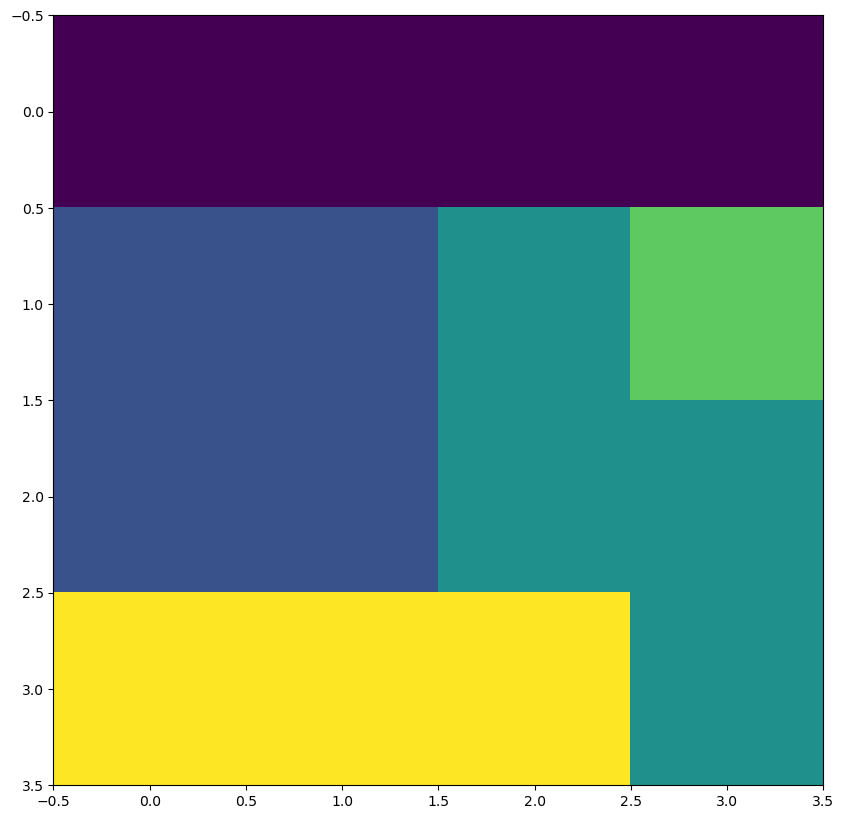

In [313]:
print(np.unique(segmented))
plt.figure(figsize=(10,10))
plt.imshow(segmented)

In [314]:

def check_neibour(clip: np.array, coord: list) -> int:
    if is_coord_inside(clip.shape, coord) is False:
        return 1
    else:
        try:
            
            if clip[coord[0], coord[1]] == False:
                # print("Diffrent")
                return 1
            return 0
        except:
            return 1
    
    
def get_permiter(segmented: np.array, number: int) -> int:
    mask = segmented == number
    perimeter = 0
    for i in range(mask.shape[0]):  # Loop over rows
        for j in range(mask.shape[1]):  # Loop over columns
            if mask[i,j] == True:
                perimeter += check_neibour(mask, [i-1,j])
                perimeter += check_neibour(mask, [i+1,j])
                perimeter += check_neibour(mask, [i,j-1])
                perimeter += check_neibour(mask, [i,j+1])
                # print(perimeter)
    return perimeter

In [315]:
total_cost= 0
for number in np.unique(segmented):
    area = (segmented == number).sum()
    perimeter = get_permiter(segmented, number)
    cost = area*perimeter
    print(f"{number} Cost: {area}*{perimeter} = {cost}")
    total_cost += cost

print(f"Total cost: {total_cost}")


1 Cost: 4*10 = 40
2 Cost: 4*8 = 32
3 Cost: 4*10 = 40
4 Cost: 1*4 = 4
5 Cost: 3*8 = 24
Total cost: 140


In [316]:
total_cost

140

4


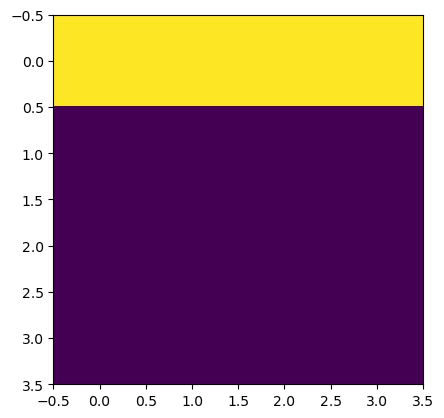

In [317]:
print((segmented==1).sum())
plt.imshow(segmented==1)

In [321]:
def calculate_region_properties(grid):
    rows = len(grid)
    cols = len(grid[0]) if rows > 0 else 0
    visited = [[False] * cols for _ in range(rows)]
    
    def dfs(r, c, plant_type):
        stack = [(r, c)]
        area = 0
        perimeter = 0
        
        while stack:
            x, y = stack.pop()
            if visited[x][y]:
                continue
            
            visited[x][y] = True
            area += 1
            
            # Check surrounding plots
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                
                if 0 <= nx < rows and 0 <= ny < cols:
                    if grid[nx][ny] == plant_type:
                        stack.append((nx, ny))
                    else:
                        perimeter += 1
                else:
                    perimeter += 1
        
        return area, perimeter

    total_price = 0
    
    for r in range(rows):
        for c in range(cols):
            if not visited[r][c]:
                plant_type = grid[r][c]
                area, perimeter = dfs(r, c, plant_type)
                total_price += area * perimeter

    return total_price

garden_map = filtred_lines


print(calculate_region_properties(garden_map))


1451030
